<a href="https://colab.research.google.com/github/Ashwini-data-wizard/Data-Analysis---Baxter/blob/main/Manufacturing_defects_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/defects_data.csv")

In [ ]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [ ]:
df.shape

(1000, 8)

In [ ]:

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isna().sum()

,0
defect_id,0
product_id,0
defect_type,0
defect_date,0
defect_location,0
severity,0
inspection_method,0
repair_cost,0


In [ ]:
df=df.drop(columns=["defect_id","product_id","defect_date"])

In [ ]:
df.head()

,defect_type,defect_location,severity,inspection_method,repair_cost
0,Structural,Component,Minor,Visual Inspection,245.47
1,Functional,Component,Minor,Visual Inspection,26.87
2,Structural,Internal,Minor,Automated Testing,835.81
3,Functional,Internal,Critical,Automated Testing,444.47
4,Cosmetic,Component,Minor,Manual Testing,823.64


In [ ]:
df_cat=df.columns[df.dtypes=='O']

In [ ]:
df_num=df.columns[df.dtypes!='O'].tolist()

In [ ]:
for i in df_cat:
    print(i," ",df[i].unique())

defect_type   ['Structural' 'Functional' 'Cosmetic']
defect_location   ['Component' 'Internal' 'Surface']
severity   ['Minor' 'Critical' 'Moderate']
inspection_method   ['Visual Inspection' 'Automated Testing' 'Manual Testing']


# **Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for i in df_cat:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

,defect_type,defect_location,severity,inspection_method,repair_cost
0,2,0,1,2,245.47
1,1,0,1,2,26.87
2,2,1,1,0,835.81
3,1,1,0,0,444.47
4,0,0,1,1,823.64


In [ ]:

df.describe()


,defect_type,defect_location,severity,inspection_method,repair_cost
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1.043000,1.027000,0.97600,1.054000,507.627150
std,0.812287,0.823984,0.80129,0.803573,289.623615
min,0.000000,0.000000,0.00000,0.000000,10.220000
25%,0.000000,0.000000,0.00000,0.000000,270.902500
50%,1.000000,1.000000,1.00000,1.000000,506.430000
75%,2.000000,2.000000,2.00000,2.000000,759.065000
max,2.000000,2.000000,2.00000,2.000000,999.640000


# **Outliers**

In [ ]:
import matplotlib.pyplot as plt

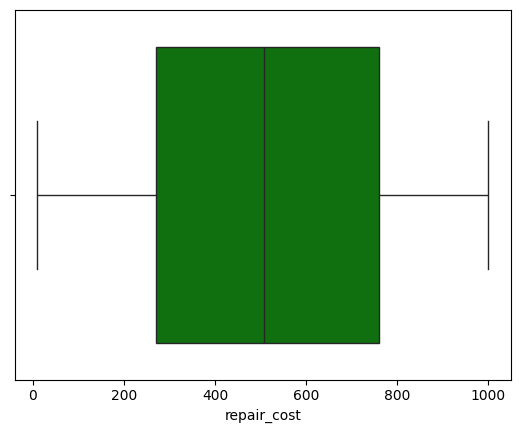

In [ ]:
for i in df_num:
    sns.boxplot(x=df[i],color='green')
    plt.show()

In [ ]:
def det_outliers(input):
  q1, q3 = input.quantile([0.25, 0.75])
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return input[(input < lower_bound) | (input > upper_bound)]


for i in df_num:
    print(det_outliers(df[i]))

Series([], Name: repair_cost, dtype: float64)


# **Skewness**

In [ ]:
for i in df_num:
    print(i,':',df[i].skew())

repair_cost : -0.029278529629238034


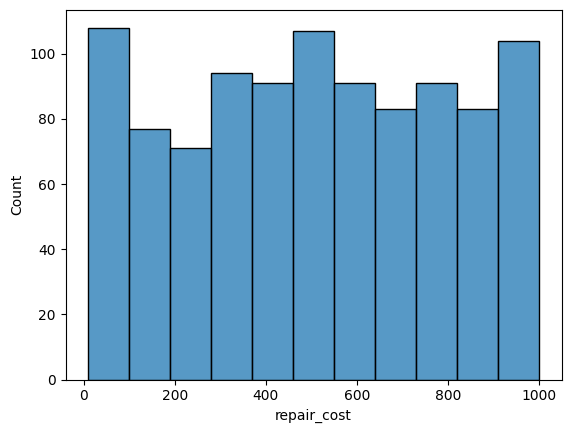

In [ ]:
for i in df_num:
    sns.histplot(df[i])
    plt.show()

<ipython-input-27-02305a284373>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['defect_type'], palette='viridis')


<Axes: xlabel='defect_type', ylabel='count'>

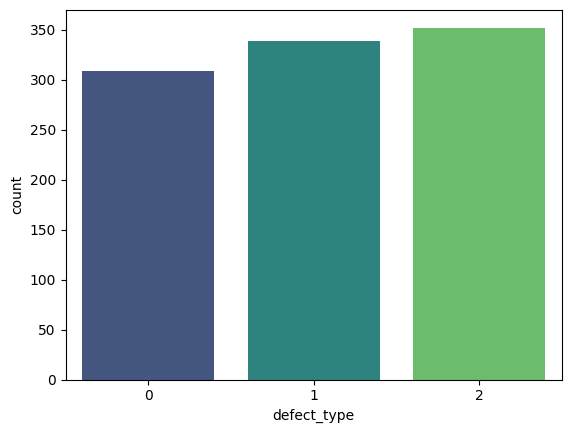

In [ ]:
sns.countplot(data=df, x=df['defect_type'], palette='viridis')


<ipython-input-28-57ac817f707b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['severity'], palette='summer')


<Axes: xlabel='severity', ylabel='count'>

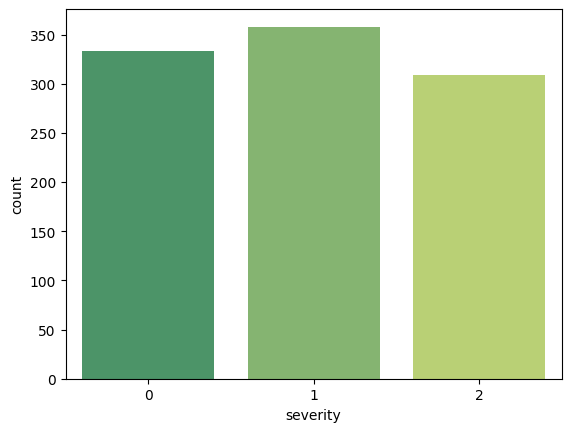

In [ ]:
sns.countplot(data=df,x=df['severity'], palette='summer')

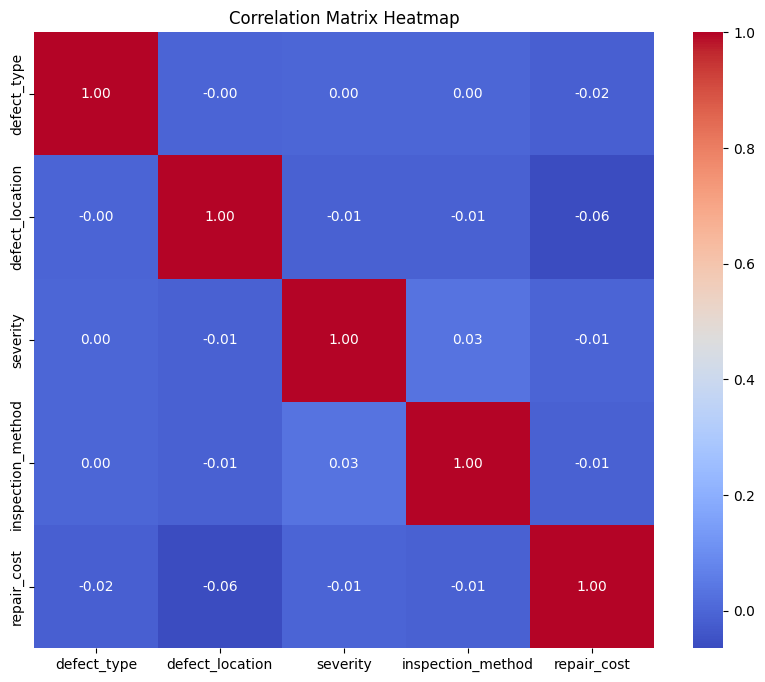

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr().abs()

# Set a threshold for identifying high correlations
threshold = 0.8

# Create an empty set to store the names of columns to drop
columns_to_drop = set()

# Iterate over the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)

# Drop the identified columns from the DataFrame
df_reduced = df.drop(columns=columns_to_drop)

# Output the reduced DataFrame
print(f"Columns dropped: {columns_to_drop}")
print(df_reduced)

Columns dropped: set()
     defect_type  defect_location  severity  inspection_method  repair_cost
0              2                0         1                  2       245.47
1              1                0         1                  2        26.87
2              2                1         1                  0       835.81
3              1                1         0                  0       444.47
4              0                0         1                  1       823.64
..           ...              ...       ...                ...          ...
995            2                0         1                  0       813.14
996            1                0         2                  0       944.07
997            2                0         1                  0       401.12
998            0                1         2                  1       775.63
999            0                0         1                  2       963.40

[1000 rows x 5 columns]


# **EDA and Visualization**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/defects_data.csv',
                 parse_dates=['defect_date'])
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64


In [ ]:
df.shape

(1000, 8)

In [ ]:
round (df[['repair_cost', 'defect_id', 'product_id']].describe(), 2)

,repair_cost,defect_id,product_id
count,1000.00,1000.00,1000.00
mean,507.63,500.50,50.84
std,289.62,288.82,29.48
min,10.22,1.00,1.00
25%,270.90,250.75,26.00
50%,506.43,500.50,51.00
75%,759.06,750.25,77.00
max,999.64,1000.00,100.00


In [ ]:
df.describe(exclude = [int,float,'datetime'])

,defect_type,defect_location,severity,inspection_method
count,1000,1000,1000,1000
unique,3,3,3,3
top,Structural,Surface,Minor,Manual Testing
freq,352,353,358,352


In [ ]:
df['defect_month']=df['defect_date'].dt.month_name()

In [ ]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost,defect_month
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47,June
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87,April
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81,February
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47,March
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64,April


Text(0, 0.5, 'Number of Deffect Ocurrences')

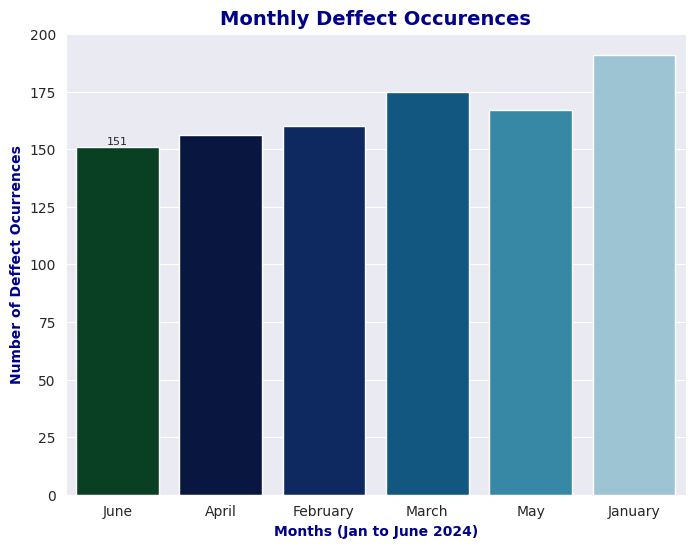

In [ ]:
plt.figure(figsize = (8,6))
sns.set_style('darkgrid')
ax = sns.countplot(df, x='defect_month', palette='ocean')
ax.bar_label(ax.containers[0], fontsize = 8)
ax.set_title("Monthly Deffect Occurences",
             fontsize = 14,
             fontweight = 'bold',
             color = 'darkblue')
ax.set_xlabel("Months (Jan to June 2024)",
             fontweight = 'bold',
             color = 'darkblue')
ax.set_ylabel("Number of Deffect Ocurrences",
             fontweight = 'bold',
             color = 'darkblue')


In [ ]:
defect_occurences = df.groupby('defect_month').size()

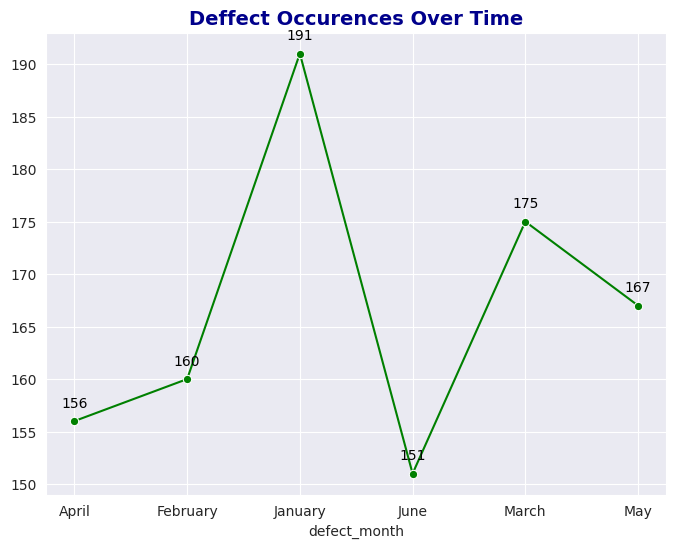

In [ ]:
plt.figure(figsize = (8,6))
sns.set_style('darkgrid')

x = defect_occurences.index
y = defect_occurences.values
ax = sns.lineplot(x= x, y = y,
                  color = 'green', marker = 'o')
ax.set_title("Deffect Occurences Over Time",
             fontsize = 14,
             fontweight = 'bold',
             color = 'darkblue')

for i, value in enumerate(y):
    plt.annotate(f'{value}',
                 (x[i], y[i]),
                 textcoords="offset points",
                 xytext=(0,10), ha='center', color='black')

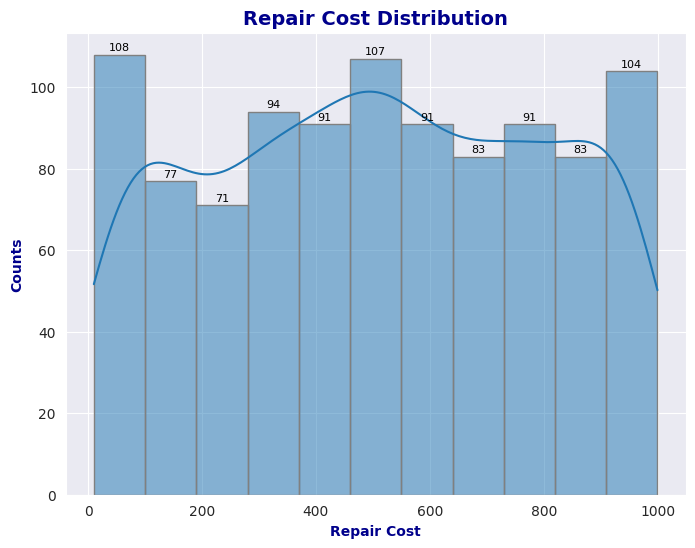

In [ ]:
plt.figure (figsize =(8,6))
sns.set_style('darkgrid')
ax = sns.histplot(df, x='repair_cost',
                  edgecolor = 'grey',
                  kde = True,
                  line_kws={'color': 'red'})
ax.set_title("Repair Cost Distribution",
             fontsize = 14,
             fontweight = 'bold',
             color = 'darkblue')
ax.set_xlabel("Repair Cost",
             fontweight = 'bold',
             color = 'darkblue')
ax.set_ylabel("Counts",
             fontweight = 'bold',
             color = 'darkblue')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center',
                va = 'center',
                xytext = (0,5),
                textcoords = 'offset points',
                fontsize = 8,
                color = 'black')

Text(0.5, 0, 'Inspection Methods')

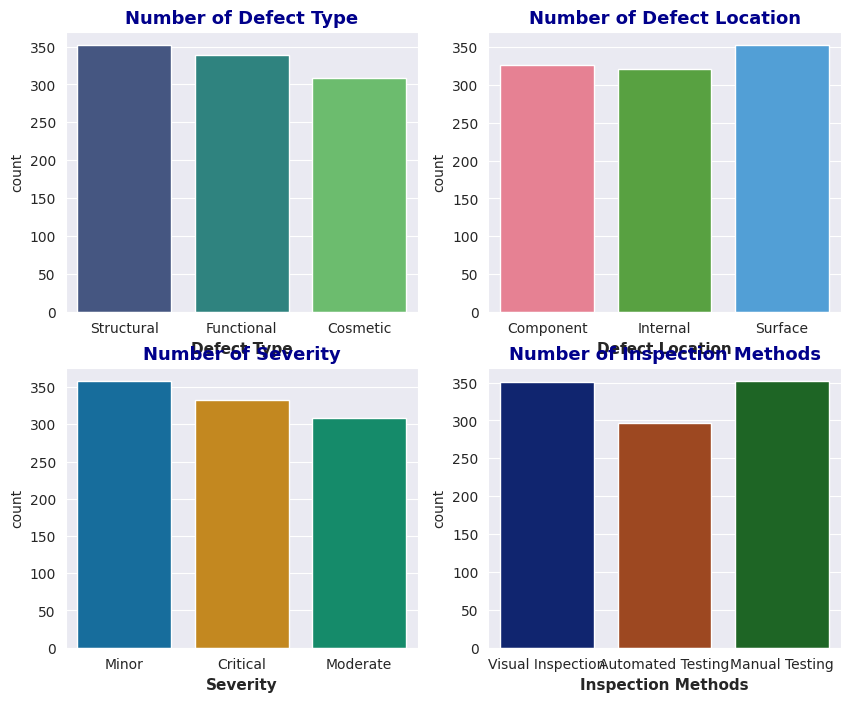

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
sns.set_style('darkgrid')

# Defect Type
sns.countplot(x=df['defect_type'], palette='viridis', ax=axs[0,0])
axs[0, 0].set_title('Number of Defect Type', fontsize = 13, fontweight = 'bold', color = 'darkblue')
axs[0, 0].set_xlabel('Defect Type',fontsize = 11, fontweight = 'bold')

# Defect Location
sns.countplot(x=df['defect_location'], palette='husl', ax=axs[0,1])
axs[0, 1].set_title('Number of Defect Location', fontsize = 13, fontweight = 'bold', color = 'darkblue')
axs[0, 1].set_xlabel('Defect Location',fontsize = 11, fontweight = 'bold')

# Severity
sns.countplot(x=df['severity'], palette='colorblind', ax=axs[1,0])
axs[1, 0].set_title('Number of Severity', fontsize = 13, fontweight = 'bold', color = 'darkblue')
axs[1, 0].set_xlabel('Severity',fontsize = 11, fontweight = 'bold')

# Inspection Method
sns.countplot(x=df['inspection_method'], palette='dark', ax=axs[1,1])
axs[1, 1].set_title('Number of Inspection Methods', fontsize = 13, fontweight = 'bold', color = 'darkblue')
axs[1, 1].set_xlabel('Inspection Methods',fontsize = 11, fontweight = 'bold')

In [ ]:
top_10_deffects = df[['product_id']].value_counts().head(10).reset_index()
top_10_deffects

,product_id,count
0,63,20
1,81,20
2,97,19
3,56,18
4,4,16
5,10,16
6,92,16
7,6,15
8,45,15
9,74,15


Text(0.5, 0, 'Product ID')

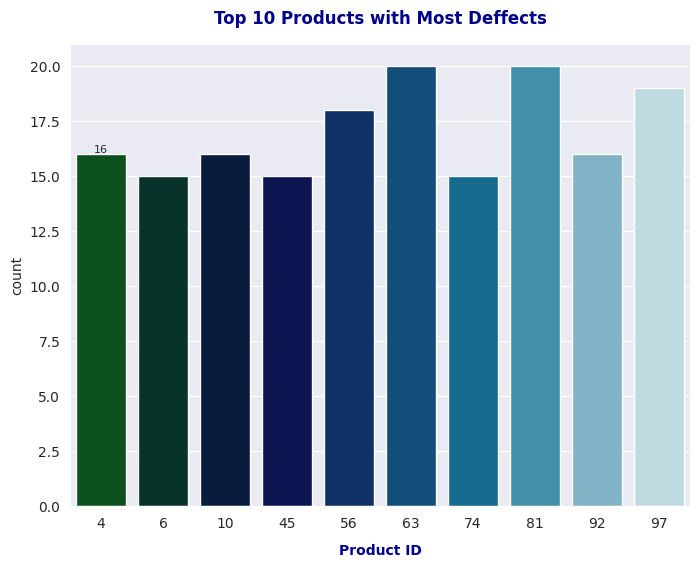

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data = top_10_deffects, x = 'product_id', y='count',
                 palette = 'ocean')
ax.bar_label(ax.containers[0], fontsize = 8)
ax.set_title('Top 10 Products with Most Deffects',
             fontweight='bold',
             color='darkblue',
             pad = 15)
ax.set_xlabel('Product ID',
              fontweight='bold',
              color='darkblue',
              labelpad = 10)

In [ ]:
# Filter the dataframe to include only the top 10 products
top_10_df = df[df['product_id'].isin(top_10_deffects['product_id'])]

# Calculate the total repair cost for the top 10 products
total_repair_cost_top_10 = top_10_df.groupby('product_id')['repair_cost'].sum().reset_index()
total_repair_cost_top_10.sort_values(by='repair_cost')

,product_id,repair_cost
0,4,6495.45
8,92,7588.84
9,97,8405.84
6,74,8460.54
1,6,8733.81
5,63,9174.06
3,45,9532.36
4,56,9916.30
2,10,10084.92
7,81,11740.64


In [ ]:
desc_top_10 = total_repair_cost_top_10.describe()
desc_top_10

,product_id,repair_cost
count,10.000000,10.000000
mean,52.800000,9013.276000
std,35.455136,1446.019433
min,4.000000,6495.450000
25%,18.750000,8419.515000
50%,59.500000,8953.935000
75%,79.250000,9820.315000
max,97.000000,11740.640000


In [ ]:
other_products_id = df[~df['product_id'].isin(top_10_deffects['product_id'])]
total_repair_cost_others = other_products_id.groupby('product_id')['repair_cost'].sum().reset_index()
total_repair_cost_others.sort_values(by='repair_cost')


,product_id,repair_cost
50,55,1295.84
76,85,1337.25
47,52,1647.65
14,18,1946.31
15,19,1982.36
...,...,...
13,17,7294.70
71,79,7426.30
39,43,7540.63
69,77,7657.37


In [ ]:
desc_others = total_repair_cost_others.describe()
desc_others

,product_id,repair_cost
count,90.000000,90.000000
mean,50.244444,4638.826556
std,28.433368,1652.010890
min,1.000000,1295.840000
25%,26.250000,3351.007500
50%,49.500000,4531.225000
75%,74.500000,5915.892500
max,100.000000,8419.220000


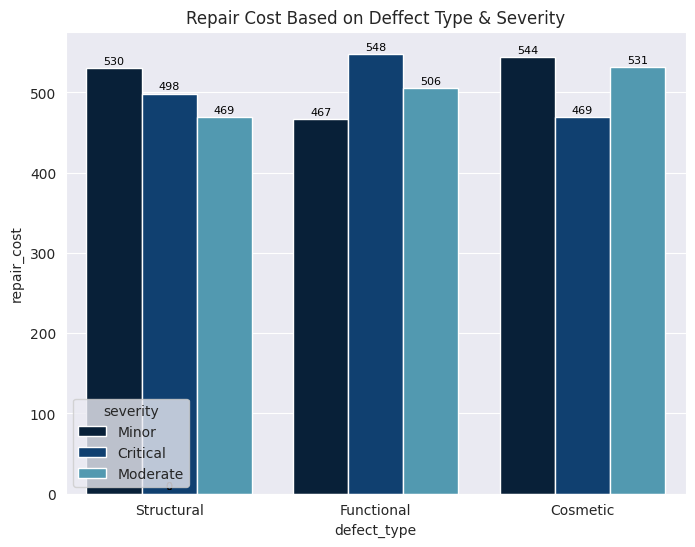

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(df, x='defect_type',
                 y='repair_cost',
                 hue='severity',
                 palette='ocean',
                 errorbar = ('ci', False))
ax.set_title("Repair Cost Based on Deffect Type & Severity")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}',
               (p.get_x() + p.get_width()/2.,height),
               ha = 'center',
               va = 'center',
               xytext = (0,5),
               textcoords = 'offset points',
               color = 'black',
               fontsize = '8')

In [ ]:
df.groupby('inspection_method')['repair_cost'].describe()

,count,mean,std,min,25%,50%,75%,max
inspection_method,,,,,,,,
Automated Testing,297.0,501.804310,304.636981,10.22,220.0100,485.270,780.0500,999.25
Manual Testing,352.0,526.074687,286.468813,10.44,294.2225,532.085,770.6025,999.64
Visual Inspection,351.0,494.054074,279.432806,16.05,275.0550,502.150,710.9750,996.49


Text(0.5, 1.0, 'Repair Cost by Inspection Method')

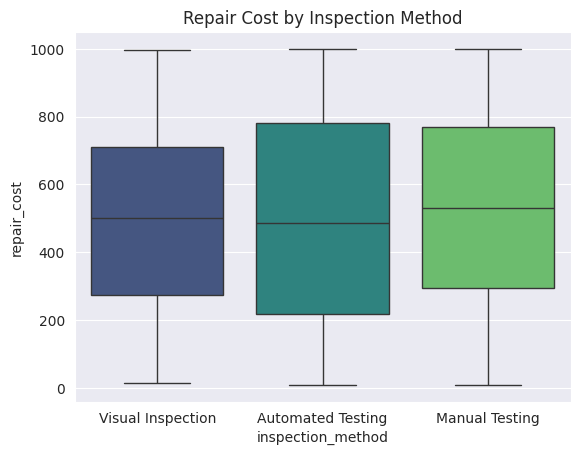

In [ ]:
sns.boxplot(x='inspection_method', y='repair_cost', data=df, palette='viridis')
plt.title('Repair Cost by Inspection Method')

In [ ]:
df['defect_type'].value_counts()

,count
defect_type,
Structural,352
Functional,339
Cosmetic,309


In [ ]:
category_count = df.groupby(['defect_type','severity','defect_location','inspection_method'])['repair_cost'].sum().unstack()
category_count

inspection_method                     Automated Testing  Manual Testing  \
defect_type severity defect_location                                      
Cosmetic    Critical Component                  5065.10         6317.62   
                     Internal                   5949.23         3716.45   
                     Surface                    5514.93         8265.16   
            Minor    Component                  5033.12         7604.65   
                     Internal                   2715.66         8822.51   
                     Surface                    6384.30         5674.10   
            Moderate Component                  6545.01         4867.92   
                     Internal                   3813.00         7687.11   
                     Surface                    4449.76         3326.67   
Functional  Critical Component                  7593.20         9441.80   
                     Internal                   8275.06         8174.14   
                     Surface                    4706.45         7971.66   
            Minor    Component                  5184.64         5468.59   
                     Internal                   3715.22         6832.03   
                     Surface                    7247.61         7257.65   
            Moderate Component                  6805.24         4383.65   
                     Internal                   2768.20         8083.24   
                     Surface                    4903.47         8353.34   
Structural  Critical Component                  2988.29         4909.00   
                     Internal                   6421.75         3764.74   
                     Surface                    7319.33         9790.41   
            Minor    Component                  5657.80         8126.90   
                     Internal                   9004.41         9837.73   
                     Surface                    5762.41        11500.29   
            Moderate Component                  7118.71         6048.24   
                     Internal                   3655.80         4175.53   
                     Surface                    4438.18         4777.16   

inspection_method                     Visual Inspection  
defect_type severity defect_location                     
Cosmetic    Critical Component                  5799.37  
                     Internal                   4902.45  
                     Surface                    4645.12  
            Minor    Component                 10020.56  
                     Internal                   4249.15  
                     Surface                    7122.67  
            Moderate Component                  5163.57  
                     Internal                   4531.89  
                     Surface                   10610.64  
Functional  Critical Component                  6012.16  
                     Internal                   6290.79  
                     Surface                    3982.65  
            Minor    Component                  4702.54  
                     Internal                   8671.25  
                     Surface                    3722.70  
            Moderate Component                 10189.50  
                     Internal                   6385.65  
                     Surface                    4783.15  
Structural  Critical Component                  7940.65  
                     Internal                   8053.39  
                     Surface                    4644.35  
            Minor    Component                  8872.19  
                     Internal                   6303.93  
                     Surface                    8672.36  
            Moderate Component                  5837.54  
                     Internal                   5127.02  
                     Surface                    6175.74

Text(120.7222222222222, 0.5, 'Deffects Overall')

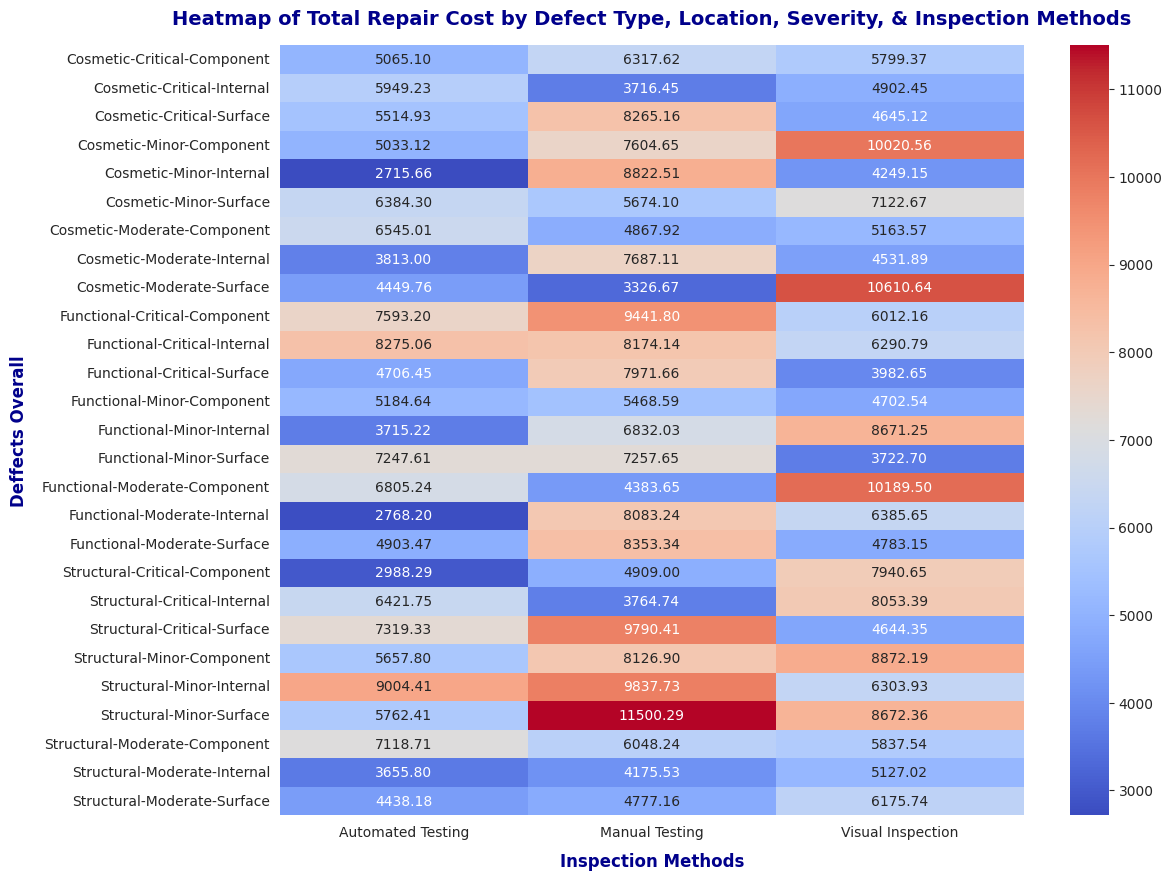

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(category_count, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Heatmap of Total Repair Cost by Defect Type, Location, Severity, & Inspection Methods',
         fontweight = 'bold', color = 'darkblue',
         fontsize = 14, pad = 15)
plt.xlabel('Inspection Methods',fontweight = 'bold', color = 'darkblue',
          fontsize = 12, labelpad = 10)
plt.ylabel('Deffects Overall',fontweight = 'bold', color = 'darkblue',
          fontsize = 12, labelpad = 10)

In [ ]:
category_count.corr()

inspection_method,Automated Testing,Manual Testing,Visual Inspection
inspection_method,,,
Automated Testing,1.000000,0.202952,-0.031088
Manual Testing,0.202952,1.000000,-0.207575
Visual Inspection,-0.031088,-0.207575,1.000000


<Axes: xlabel='defect_type', ylabel='repair_cost'>

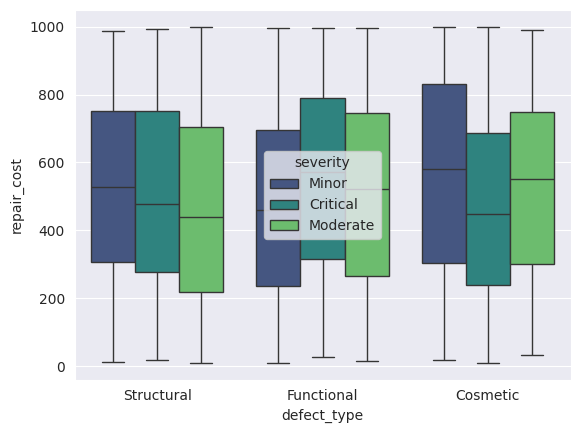

In [ ]:
sns.boxplot(df, x='defect_type', y='repair_cost', hue='severity', palette='viridis')

In [ ]:
severity_mapping = {'Minor': 1, 'Major': 2, 'Critical': 3}
df['severity_ordinal'] = df['severity'].map(severity_mapping)
correlation = df[['severity_ordinal', 'repair_cost']].corr()
print(correlation)

                  severity_ordinal  repair_cost
severity_ordinal           1.00000     -0.01481
repair_cost               -0.01481      1.00000


# **Prediction**

In [ ]:
df = pd.read_csv('/content/defects_data.csv')

In [ ]:
print(df.columns)

Index(['defect_id', 'product_id', 'defect_type', 'defect_date',
       'defect_location', 'severity', 'inspection_method', 'repair_cost'],
      dtype='object')


In [ ]:
features = ['product_id', 'defect_type', 'severity' , 'severity']

In [ ]:
X = df[features]
y = df['repair_cost']

In [ ]:
df.columns = df.columns.str.strip()

# Use .str.lower() to ensure all columns are lowercase (if needed)
df.columns = df.columns.str.lower()

In [ ]:
features = ['product_id', 'defect_type', 'severity' , 'severity']
X = df[features]

In [ ]:


X.head()


,product_id,defect_type,severity,severity
0,15,Structural,Minor,Minor
1,6,Functional,Minor,Minor
2,84,Structural,Minor,Minor
3,10,Functional,Critical,Critical
4,14,Cosmetic,Minor,Minor
